In [649]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [650]:
df=pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [651]:
df.shape

(892, 6)

In [652]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [653]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [654]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [655]:
df['Price'].unique()
# ask for price needs to be removed

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

## data cleaning

In [656]:
df=df[df['year'].str.isnumeric()]

In [657]:
df['year']=df['year'].astype(int)

In [658]:
df=df[df['Price']!='Ask For Price']

In [659]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [660]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [661]:
df=df[df['kms_driven'].str.isnumeric()]

In [662]:
df=df.dropna()

In [663]:
df['name']=df['name'].str.split(' ').str.slice(0,4).str.join(' ')

In [664]:
df=df.reset_index(drop=True)

In [665]:
## cleaned data
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [625]:
df_cleaned_1=df[df['Price']<=6000000].reset_index(drop=True)

## model making

In [626]:
df_cleaned.tail(10)

,name,company,year,Price,kms_driven,fuel_type
805,Hyundai Getz,Hyundai,2006,125000,80000,Petrol
806,Mercedes Benz C Class,Mercedes,2006,500001,15000,Petrol
807,Maruti Suzuki Alto LXi,Maruti,2005,95000,65000,Petrol
808,Maruti Suzuki Swift Dzire,Maruti,2009,250000,51000,Diesel
809,Skoda Fabia,Skoda,2009,110000,45000,Petrol
810,Maruti Suzuki Ritz VXI,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2 DLE,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
814,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel


In [627]:
X=df_cleaned.drop(columns=['Price'])
y=df_cleaned['Price']

In [628]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [629]:
df_cleaned['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Datsun'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'Volkswagen'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Mini'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Hindustan'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Force'),
  Text(20, 0, 'Mercedes'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Volvo')])

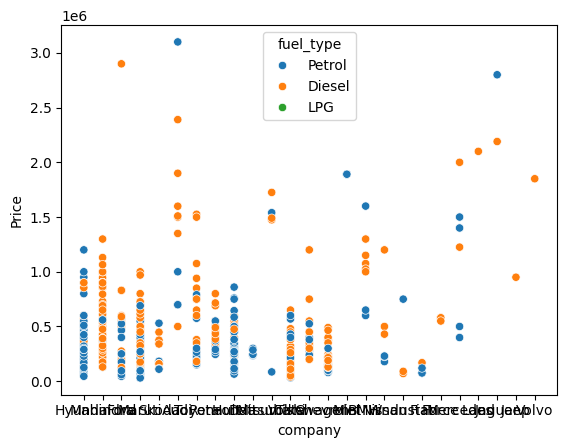

In [630]:
sns.scatterplot(x=X['company'],y=y,hue=X['fuel_type'])
plt.xticks(rotation=0)

In [631]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [632]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [633]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [634]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [635]:
lr=LinearRegression()

In [636]:
pipe=make_pipeline(column_trans,lr)

In [637]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40', 'Audi A4 1.8 TFSI', 'Audi A4 2.0 TDI',
       'Audi A6 2.0 TDI', 'Audi A8', 'Audi Q3 2.0 TDI', 'Audi Q5 2.0 TDI',
       'Audi Q7', 'BMW 3 Series 320d', 'BMW 3 Series 320i',
       'BMW 5 Series 520d', 'BMW 5 Series 530i', 'BMW 7 Series 740Li',
       'BMW X1'...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [638]:
y_pred=pipe.predict(X_test)

In [639]:
r2_score(y_test,y_pred)

0.6060861602572911

now we have to find the hyperparameters which will give the highest r2_score

In [640]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [641]:
np.argmax(scores)

636

In [642]:
scores[np.argmax(scores)]

0.861819035464696

In [643]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.861819035464696

In [644]:
import pickle

In [645]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [646]:
pipe.predict(pd.DataFrame([['Mercedes Benz C Class','Mercedes',2010,15000,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([1177070.24841467])

In [647]:
df.to_csv('df_cleaned_1.csv')

In [666]:
df_cleaned

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz VXI,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2 DLE,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
